In [1]:
from pandas import DataFrame
import pandas as pd
# # df = DataFrame.from_csv("reviews.tsv", sep="\t")
import scipy as sp
# data = sp.genfromtxt("reviews.tsv", delimiter="\t")

# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New Yor...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured acro...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a si...",R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,"Michael Douglas runs afoul of a treacherous supervisor in this film version of Michael Crichton's novel. Douglas plays Tom Sanders, an executive at DigiCom, a leading computer software firm. DigiCom is about to launch a new virtual reality-based data storage system that is ex...",R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [2]:
search_info = pd.read_csv('reviews.tsv',delimiter='\t',nrows=2000,encoding='utf-8-sig')
movie_info = pd.read_csv('movie_info.tsv',delimiter='\t',nrows=2000,encoding='utf-8-sig') 

    
search_info['review'] = search_info['review'].fillna(value=' ')
search_info.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"Continuing along a line introduced in last year's ""A Dangerous Method"", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, ""Cosmopolis"".",NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [116]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [117]:
search_info['review']=search_info['review'].str.lower()
punct_re = r'[^\w\s]'
search_info['no_punc'] = search_info['review'].str.replace(punct_re,' ')
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/contractions.py
from contractions import CONTRACTION_MAP
CONTRACTION_MAP


{"ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'd've": 'he would have',
 "he'll": 'he will',
 "he'll've": 'he he will have',
 "he's": 'he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'mad

In [118]:
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        # not sure why below is there
        # expanded_contraction = first_char+expanded_contraction[1:] 
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [119]:
search_info['no_punc'] = [expand_contractions(sentence, CONTRACTION_MAP) for sentence in search_info['no_punc']]
# text

In [127]:
ss=[]
for sentence in search_info['no_punc']:
    ss.append(sid.polarity_scores(sentence))



In [128]:
polarity=pd.DataFrame(ss)
search_info['polarity'] = polarity['compound']
# search_info.head()

In [129]:
# search_info=search_info.drop(columns=['critic', 'top_critic','publisher','date','poplarity'])

In [130]:
print("The worst polarity review")
search_info.sort_values(by=['polarity']).head()[['review','polarity']]

The worst polarity review


,review,polarity
511,"there's something dreadfully wrong when the picture shows signs of completely misunderstanding, or choosing to ignore, the dead moral centre of carver's story. why, then, bother to adapt it?",-0.9589
1776,"the level of exaggerated violence and gore is so gross and disgusting that the film takes on a horror-movie look, which tends to undermine its intentions as a thoughtful exploration of troubled times for blacks.",-0.9556
470,"throughout jindabyne, i felt completely creeped out. from the disturbing opening to images of children killing animals, adults abusing each other, and a corpse, the viewing experience was unpleasant.",-0.9552
1522,one of the worst movies that has ever been conceived. i loathed and despised absolutely every pathetic second of it.,-0.9310
504,"murder isn't allowed to become a distraction. consequently, with all its haunting moodiness, moral alarm bells and relational issues, the film isn't much more than the unexpanded short story it derives from.",-0.9217


In [131]:
 print("The most positive review")
search_info.sort_values(by=['polarity'],ascending=False).head()[['review','polarity']]


The most positive review


,review,polarity
1015,"coffee and cigarettes feels thin and slight at times.... but at its best, the movie achieves the charm and delight that underscores jarmusch's best work",0.9735
1656,"at first, the great beauty plays like an enjoyably exuberant satire of modern rome. yet slowly, grandeur starts shining through the decadence.",0.9698
1712,"the great beauty"" is italy's submission for best foreign language film and is one of the best of the year. it works on many levels including its excellent character study by toni servillo.",0.9682
1694,"it's not often that we feel ravaged by a film, but the great beauty is a ravager, a spectacular odyssey of emotion and intellect and sensuality through the rich, contradictory and self indulgent world of the eternal city",0.9620
852,"american hustle"" is a good film that could have been great had it not gone into hibernation through its middle portion. however, thanks to one of the year's best ensembles and russell's keen eye for direction it becomes an enjoyable romp.",0.9612


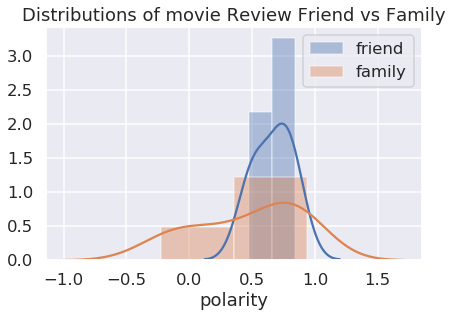

In [132]:
sns.distplot(search_info[search_info['review'].str.lower().str.contains(pat='friend')]['polarity'],label='friend' )
sns.distplot(search_info[search_info['review'].str.lower().str.contains(pat='family')]['polarity'],label='family' )
plt.title('Distributions of movie Review Friend vs Family')
plt.legend();
